Muhammad Hassaan Azam <br>
AI/ML Trainee

DHC 831


# **Heart Disease Prediction**

## **Installing UCI Library to load dataset**

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# # metadata
# print(heart_disease.metadata)

# # variable information
# print(heart_disease.variables)


## **Dataset Description**

| **Variable**   | **Description**                                                                                  |
|----------------|--------------------------------------------------------------------------------------------------|
| `age`          | Age of the patient in years                                                                      |
| `sex`          | Gender of the patient (`0 = male`, `1 = female`)                                                 |
| `cp`           | Chest pain type:                                                                                 |
|                | - `0`: Typical angina                                                                            |
|                | - `1`: Atypical angina                                                                           |
|                | - `2`: Non-anginal pain                                                                          |
|                | - `3`: Asymptomatic                                                                              |
| `trestbps`     | Resting blood pressure (in mm Hg)                                                                |
| `chol`         | Serum cholesterol (in mg/dl)                                                                     |
| `fbs`          | Fasting blood sugar level (`1 = true` if >120 mg/dl, `0 = false`)                                |
| `restecg`      | Resting electrocardiographic results:                                                            |
|                | - `0`: Normal                                                                                    |
|                | - `1`: Having ST-T wave abnormality                                                              |
|                | - `2`: Probable or definite left ventricular hypertrophy                                         |
| `thalach`      | Maximum heart rate achieved during a stress test                                                 |
| `exang`        | Exercise-induced angina (`1 = yes`, `0 = no`)                                                    |
| `oldpeak`      | ST depression induced by exercise relative to rest                                               |
| `slope`        | Slope of the peak exercise ST segment:                                                           |
|                | - `0`: Upsloping                                                                                 |
|                | - `1`: Flat                                                                                      |
|                | - `2`: Downsloping                                                                               |
| `ca`           | Number of major vessels (0–3) colored by fluoroscopy                                             |
| `thal`         | Thallium stress test result:                                                                     |
|                | - `3`: Normal                                                                                    |
|                | - `6`: Fixed defect                                                                              |
|                | - `7`: Reversible defect                                                                         |
| `target`       | Heart disease status (`0 = no disease`, `1 = presence of disease`)                               |

---


## Merging Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Concatenate X and y along columns (axis=1)
df = pd.concat([X, y], axis=1)

# Display the first few rows of the DataFrame
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


## **Data Preprocessing**

### **Dropping Duplicate Records**

In [ ]:
df.drop_duplicates(inplace=True)

### **Changing the Name of Dependent/Target Variable**

In [ ]:
# Replacing the name of "num" varible with "target"
df.rename(columns={'num': 'target'}, inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


### **Dependent variable consists of 5 categories and we will convert it into binary categories.**

In [ ]:
df['target'].value_counts()

,count
target,
0,164
1,55
2,36
3,35
4,13


Target Variable: num (indicates the presence of heart disease in the patient)

The num variable in the UCI Heart Disease dataset is typically used to indicate the presence and severity of heart disease based on angiographic disease status. The values of num generally range from 0 to 4, with each number representing a different level of severity:

0: No presence of heart disease.
<br><br>
1: Mild or some presence of heart disease.<br>
2: Moderate presence of heart disease.<br>
3: Severe presence of heart disease.<br>
4: Very severe presence of heart disease.

In [ ]:
df['target'] = df['target'].apply(lambda x: 1 if x>0 else 0)
df['target'].value_counts()

,count
target,
0,164
1,139


### **Checking and Handling Null Values in our Features (Columns)**

In [ ]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [ ]:
# As both are categorical columns we replace null values with mode
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### **Column "cp" conversion**

Column "cp" has value range form 1 to 4, we will convert its values into 0 to 3.

In [ ]:
df['cp'].value_counts()

,count
cp,
4,144
3,86
2,50
1,23


In [ ]:
 df['cp'] =  df['cp'] - 1

 df['cp'].value_counts()

,count
cp,
3,144
2,86
1,50
0,23


## **EDA (Exploratory Data Analysis)**

### **Checking Correlation of Columns in the form Matrix**

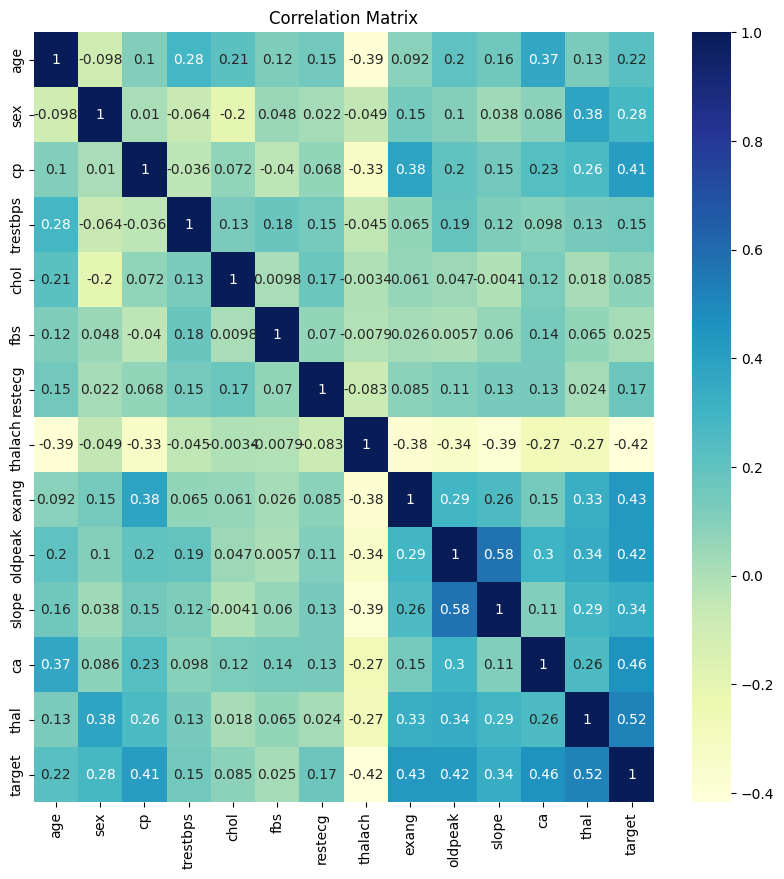

In [ ]:
data_corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data_corr, annot=True, cmap='YlGnBu')
plt.title("Correlation Matrix")
plt.show()

### **Checking Correlation with our Target Variable**

<Axes: >

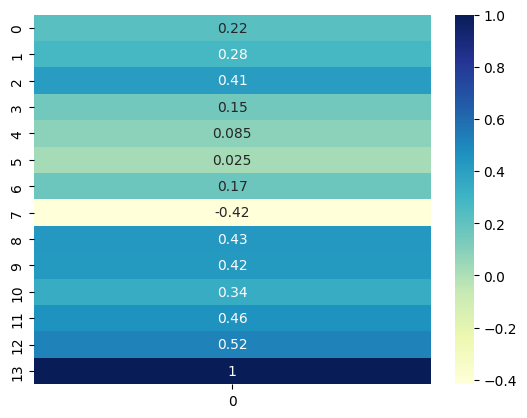

In [ ]:
# df.corr()['target']
sns.heatmap(df.corr()['target'].values.reshape(-1, 1), annot=True, cmap='YlGnBu')

### **Age Distribution**

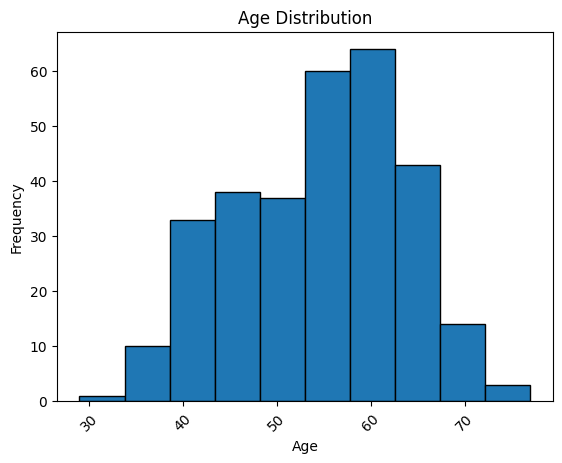

In [ ]:
df['age'].plot(kind='hist', bins=10, edgecolor='black')
plt.xticks(rotation=45)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### **Gender Distribution**

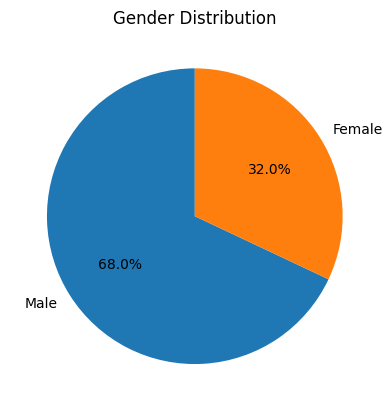

In [ ]:
from enum import auto
# Gender of the patient (0 = male, 1 = female)

df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=['Male', 'Female'])
plt.title('Gender Distribution')  # Add a title for clarity
plt.ylabel('')  # Remove the default ylabel
plt.show()



### **Chest Pain Type Distribution**

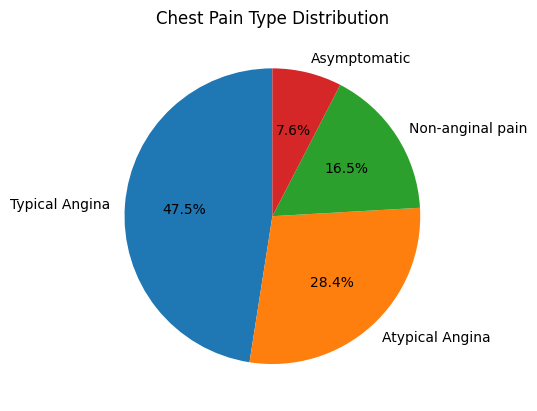

In [ ]:
df['cp'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90,
                             labels=['Typical Angina', 'Atypical Angina',
                                     'Non-anginal pain', 'Asymptomatic'])
plt.title('Chest Pain Type Distribution')  # Add a title for clarity
plt.ylabel('')  # Remove the default ylabel
plt.show()


### **Resting Blood Pressure Distribution**

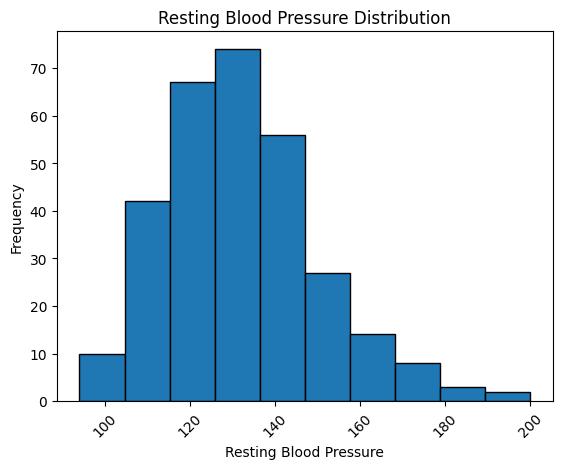

In [ ]:
df['trestbps'].plot(kind='hist', bins=10, edgecolor='black')
plt.xticks(rotation=45)
plt.title('Resting Blood Pressure Distribution')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Frequency')
plt.show()


### **Serum Cholesterol Distribution**

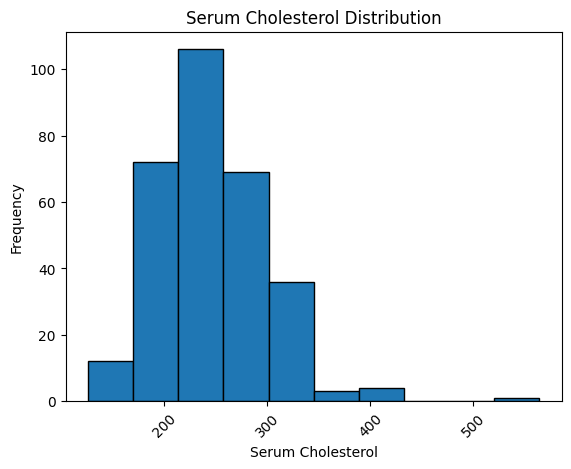

In [ ]:
df['chol'].plot(kind='hist', bins=10, edgecolor='black')
plt.xticks(rotation=45)
plt.title('Serum Cholesterol Distribution')
plt.xlabel('Serum Cholesterol')
plt.ylabel('Frequency')
plt.show()


### **Fasting Blood Sugar Distribution**

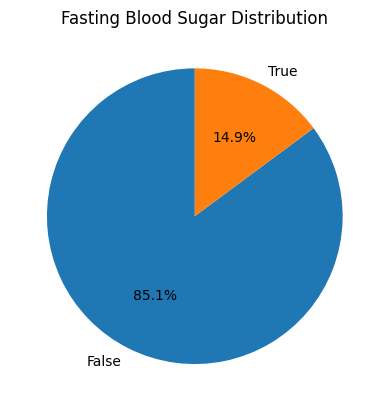

In [ ]:
df['fbs'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=['False', 'True'])
plt.title('Fasting Blood Sugar Distribution')  # Add a title for clarity
plt.ylabel('')  # Remove the default ylabel
plt.show()


### **Resting Electrocardiographic Results Distribution**

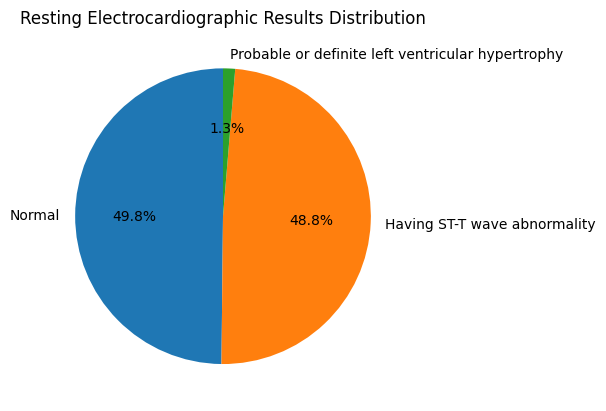

In [ ]:
# restecg	Resting electrocardiographic results:
# - 0: Normal
# - 1: Having ST-T wave abnormality
# - 2: Probable or definite left ventricular hypertrophy
df['restecg'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90,
                                  labels=['Normal', 'Having ST-T wave abnormality',
                                          'Probable or definite left ventricular hypertrophy'])
plt.title('Resting Electrocardiographic Results Distribution')  # Add a title for clarity
plt.ylabel('')  # Remove the default ylabel
plt.show()


### **Maximum Heart Rate Achieved During a Stress Test Distribution**

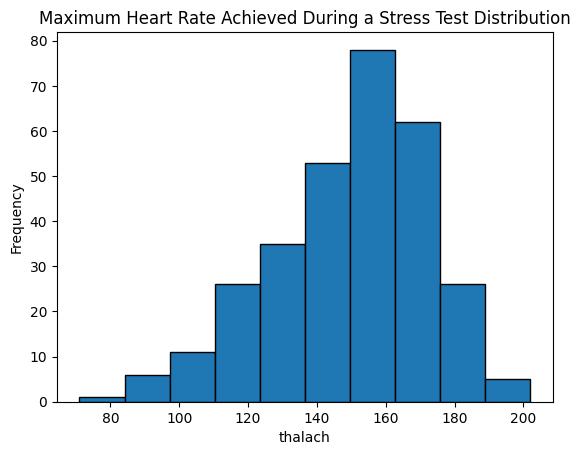

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has a column named 'thalach'
df['thalach'].plot(kind='hist', bins=10, edgecolor='black')

plt.xlabel('Maximum Heart Rate')
plt.ylabel('Frequency')
plt.title('Maximum Heart Rate Achieved During a Stress Test Distribution')
plt.show()


### **Exercise-Induced Angina Distribution**

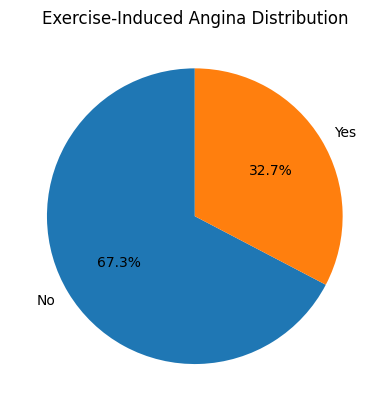

In [ ]:
df['exang'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=['No', 'Yes'])
plt.title('Exercise-Induced Angina Distribution')  # Add a title for clarity
plt.ylabel('')  # Remove the default ylabel
plt.show()


### **ST Depression Induced by Exercise Relative to Rest Distribution**

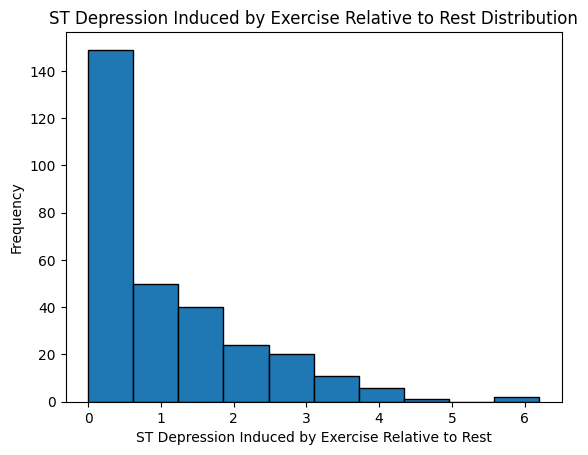

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has a column named 'oldpeak'
df['oldpeak'].plot(kind='hist', bins=10, edgecolor='black')

plt.xlabel('ST Depression Induced by Exercise Relative to Rest')
plt.ylabel('Frequency')
plt.title('ST Depression Induced by Exercise Relative to Rest Distribution')
plt.show()



### **Slope Distribution**

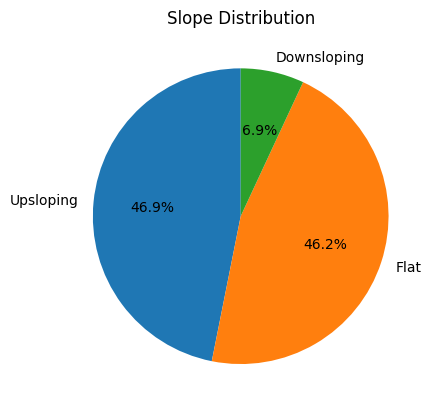

In [ ]:
df['slope'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90,
                                labels=['Upsloping', 'Flat', 'Downsloping'])
plt.title('Slope Distribution')  # Add a title for clarity
plt.ylabel('')  # Remove the default ylabel
plt.show()


### **Number of Major Vessels Distribution**

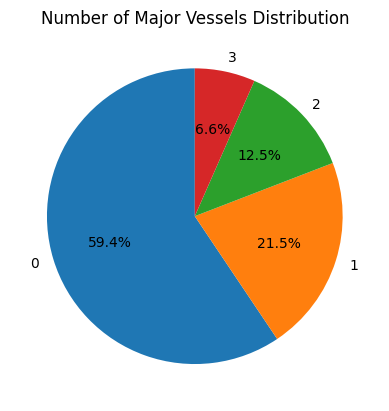

In [ ]:
df['ca'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=['0', '1', '2', '3'])
plt.title('Number of Major Vessels Distribution')  # Add a title for clarity
plt.ylabel('')  # Remove the default ylabel
plt.show()


### **Thallium Stress Test Distribution**

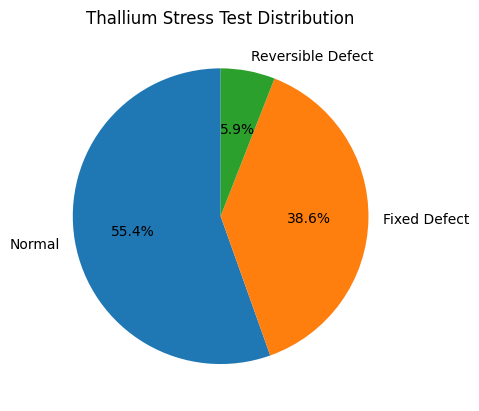

In [ ]:
df['thal'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90,
                               labels=['Normal', 'Fixed Defect', 'Reversible Defect'])
plt.title('Thallium Stress Test Distribution')  # Add a title for clarity
plt.ylabel('')  # Remove the default ylabel
plt.show()


### **Heart Disease Status Distribution**

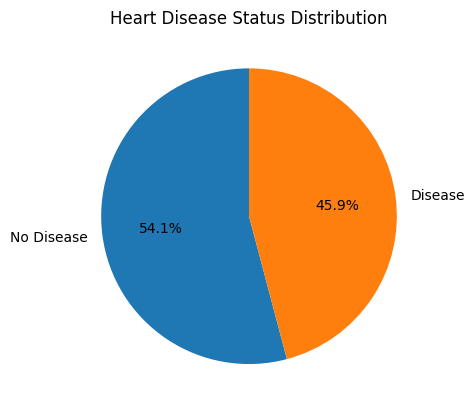

In [ ]:
df['target'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=['No Disease', 'Disease'])
plt.title('Heart Disease Status Distribution')  # Add a title for clarity
plt.ylabel('')  # Remove the default ylabel
plt.show()

## **Encoding of Independent Categorical Variables**

In [ ]:
# one hot encoding using pandas (get_dummies)
df = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], drop_first=True, dtype=int)

df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,restecg_1,restecg_2,exang_1,slope_2,slope_3,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,63,145,233,150,2.3,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,67,160,286,108,1.5,1,1,0,0,1,...,0,1,1,1,0,0,0,1,0,0
2,67,120,229,129,2.6,1,1,0,0,1,...,0,1,1,1,0,0,1,0,0,1
3,37,130,250,187,3.5,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,41,130,204,172,1.4,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
X = df.drop(columns=['target'])
y = df['target']

In [ ]:
X

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_2,slope_3,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,63,145,233,150,2.3,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0
1,67,160,286,108,1.5,1,0,0,1,0,0,1,1,1,0,0,0,1,0,0
2,67,120,229,129,2.6,1,0,0,1,0,0,1,1,1,0,0,1,0,0,1
3,37,130,250,187,3.5,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,41,130,204,172,1.4,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,110,264,132,1.2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
299,68,144,193,141,3.4,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1
300,57,130,131,115,1.2,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1
301,57,130,236,174,0.0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0


## **Dataset Split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=7)

In [ ]:
X_train

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_2,slope_3,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
285,58,114,318,140,4.4,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0
173,62,140,394,157,1.2,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
196,69,160,234,131,0.1,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0
96,59,110,239,142,1.2,1,0,0,1,0,0,1,1,1,0,1,0,0,0,1
5,56,120,236,178,0.8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,62,140,268,160,3.6,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0
51,65,120,177,140,0.4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
157,58,125,300,171,0.0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1
91,62,160,164,145,6.2,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1


## **Feature Scaling or Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns to scale
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform the specified columns
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

# Transform the specified columns of the test data using the same scaler
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])


In [ ]:
class_names = ['No Disease', 'Disease']
print("Class Names:", class_names)

Class Names: ['No Disease', 'Disease']


## **Machine Learning Algorithms**

### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    random_state=7
)
logr.fit(X_train, y_train)


y_test_pred = logr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')

f1 = f1_score(y_test, y_test_pred, average='weighted')
# conf_matrix = confusion_matrix(y_test, y_test_pred)

print("Logistic Regression Results:")
print("----------------------------")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# print("Confusion Matrix:\n", conf_matrix)

Logistic Regression Results:
----------------------------
Accuracy: 0.9180327868852459
Precision: 0.9182649380335013
Recall: 0.9180327868852459
F1 Score: 0.9178993260226438


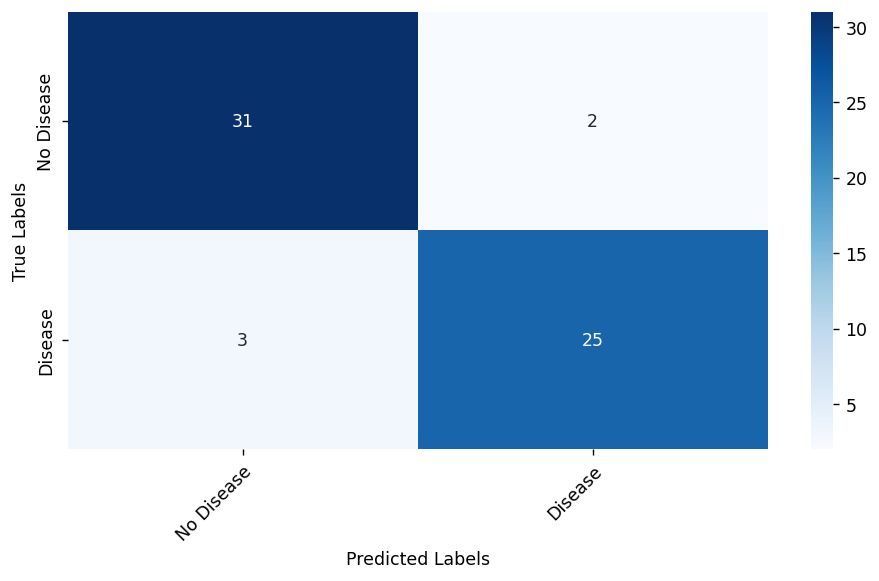

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
# font = {
#     'size'   : 7}
# plt.rc('font', **font)
cm = metrics.confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(figsize=(10,5), dpi=125)
# Create colored confusion matrix with unique labels
labels = list(class_names)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
 # Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
# Adjust the margins around the figure
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
# fig.savefig('Confusion Matrix.png')
plt.show()

### **Random Forest**

In [ ]:
# Importing RandomForestRegressor function from ensemble

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, max_depth=200)
rf.fit(X_train, y_train)


y_test_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')

f1 = f1_score(y_test, y_test_pred, average='weighted')
# conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Random Forest Results:")
print("----------------------------")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# print("Confusion Matrix:\n", conf_matrix)

Random Forest Results:
----------------------------
Accuracy: 0.7868852459016393
Precision: 0.7879781420765027
Recall: 0.7868852459016393
F1 Score: 0.785486625694267


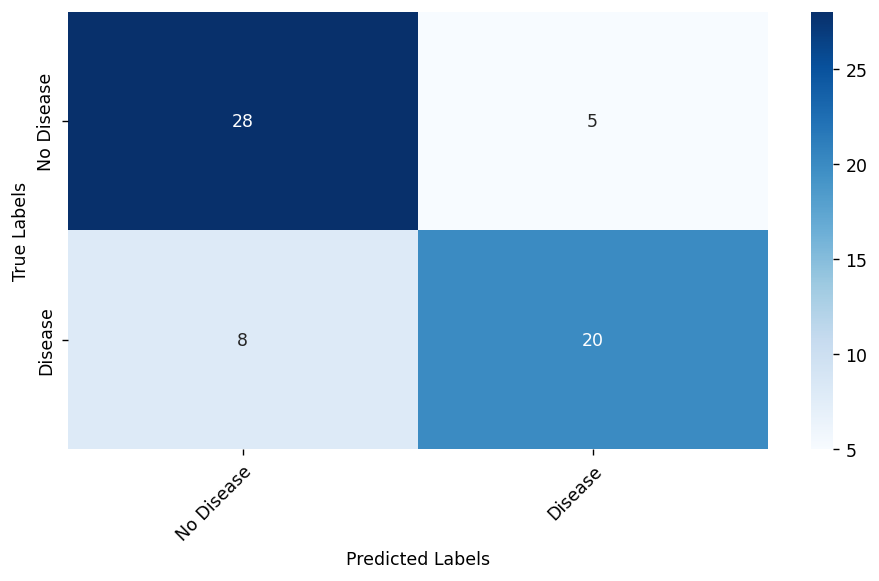

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
# font = {
#     'size'   : 7}
# plt.rc('font', **font)
cm = metrics.confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(figsize=(10,5), dpi=125)
# Create colored confusion matrix with unique labels
labels = list(class_names)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
 # Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
# Adjust the margins around the figure
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
# fig.savefig('Confusion Matrix.png')
plt.show()

### **SVM**

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel="rbf", C=50)
svm.fit(X_train, y_train)


y_test_pred = svm.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')

f1 = f1_score(y_test, y_test_pred, average='weighted')
# conf_matrix = confusion_matrix(y_test, y_test_pred)
print("SVM Results:")
print("----------------------------")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# print("Confusion Matrix:\n", conf_matrix)

SVM Results:
----------------------------
Accuracy: 0.8032786885245902
Precision: 0.8032786885245902
Recall: 0.8032786885245902
F1 Score: 0.8032786885245902


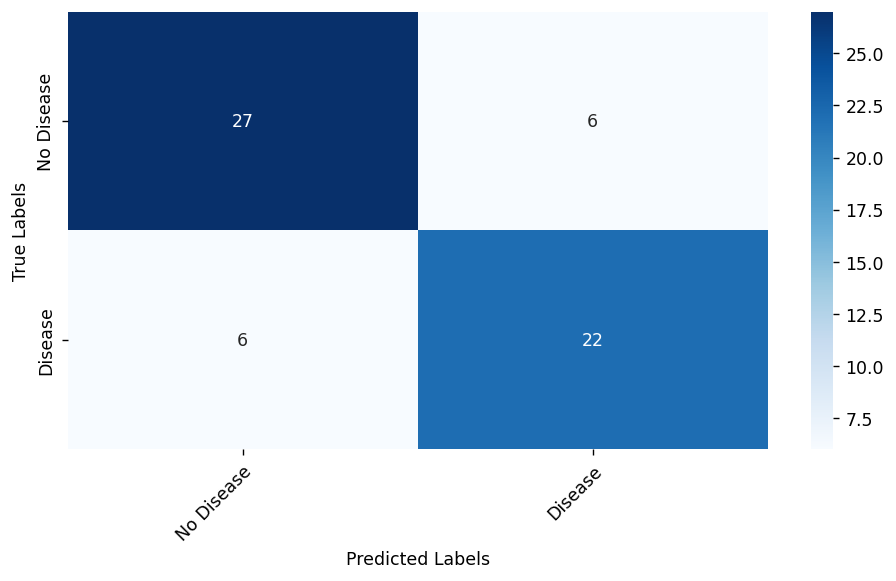

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
# font = {
#     'size'   : 7}
# plt.rc('font', **font)
cm = metrics.confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(figsize=(10,5), dpi=125)
# Create colored confusion matrix with unique labels
labels = list(class_names)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
 # Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
# Adjust the margins around the figure
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
# fig.savefig('Confusion Matrix.png')
plt.show()

### **XGBoost**

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=200, max_depth=200)

xgb.fit(X_train, y_train)


y_test_pred = xgb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')

f1 = f1_score(y_test, y_test_pred, average='weighted')
# conf_matrix = confusion_matrix(y_test, y_test_pred)
print("XGBoost Results:")
print("----------------------------")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# print("Confusion Matrix:\n", conf_matrix)

XGBoost Results:
----------------------------
Accuracy: 0.7704918032786885
Precision: 0.7704197441902361
Recall: 0.7704918032786885
F1 Score: 0.7696167720275724


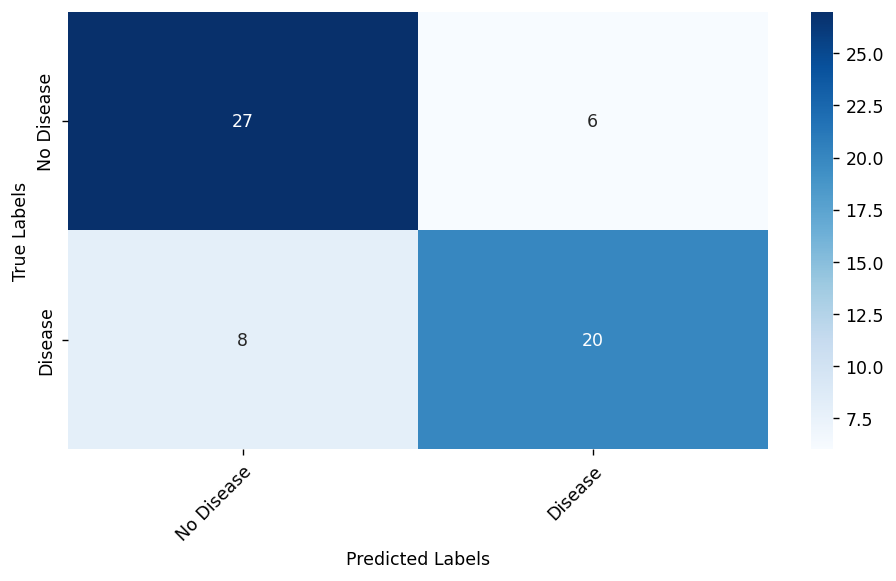

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
# font = {
#     'size'   : 7}
# plt.rc('font', **font)
cm = metrics.confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(figsize=(10,5), dpi=125)
# Create colored confusion matrix with unique labels
labels = list(class_names)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
 # Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
# Adjust the margins around the figure
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
# fig.savefig('Confusion Matrix.png')
plt.show()

## **Results**

Out of all models Logistic Regression performed best.